In [113]:
import pandas as pd
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
from collections import defaultdict
from arabic_reshaper import reshape
from bidi.algorithm import get_display
import time

In [114]:
file_path = "studentcourses.xlsx"
df1 = pd.read_excel(file_path, sheet_name="علوم طبية ")
df1.columns=['م', 'رقم الطالب', 'اسم الطالب', 'التخصص', 'رقم المقرر', 'اسم المقرر', 'رمز المقرر', 'رقم الشعبة']

df2=pd.read_excel(file_path, sheet_name="صيدلة وطب اسنان")
df2.columns=['م', 'رقم الطالب', 'اسم الطالب', 'التخصص', 'رقم المقرر', 'اسم المقرر', 'رمز المقرر', 'رقم الشعبة']

df3=pd.read_excel(file_path, sheet_name="العلوم الادارية")
df3.columns=['م', 'رقم الطالب', 'اسم الطالب', 'التخصص', 'رقم المقرر', 'اسم المقرر', 'رمز المقرر', 'رقم الشعبة']

df4=pd.read_excel(file_path, sheet_name="الهندسة")
df4.columns=['م', 'رقم الطالب', 'اسم الطالب', 'التخصص', 'رقم المقرر', 'اسم المقرر', 'رمز المقرر', 'رقم الشعبة']

df5=pd.read_excel(file_path, sheet_name="حاسب الي")
df5.columns=['م', 'رقم الطالب', 'اسم الطالب', 'التخصص', 'رقم المقرر', 'اسم المقرر', 'رمز المقرر', 'رقم الشعبة']

combined_df = pd.concat([df2, df1, df3, df4, df5], ignore_index=True)

In [115]:
#احول الداتا اللي جوا الاعمده ل انها تتقرا صح بالعربي
def format_arabic(text):
    """Properly formats Arabic text for display"""
    reshaped_text = reshape(str(text))
    return get_display(reshaped_text)

combined_df = combined_df.drop('م', axis=1)
combined_df = combined_df.drop_duplicates()
print(combined_df.head())

     رقم الطالب                           اسم الطالب             التخصص  \
0  1201321056.0               سعد عامر خضران الرشيدي  طب وجراحة الأسنان   
1  1201321047.0               طارق حمود معجب الرشيدي  طب وجراحة الأسنان   
2  1201321035.0  عبدالسلام فواز مقحم العقيلي المطيري  طب وجراحة الأسنان   
3  1201321037.0                فهد سعود رباح الرشيدي  طب وجراحة الأسنان   
4  1201321059.0            عبدالله دعيع عايض الرشيدي  طب وجراحة الأسنان   

  رقم المقرر          اسم المقرر رمز المقرر رقم الشعبة  
0   120113.0  anatomy& histology    112 ana   212113.0  
1   120113.0  anatomy& histology    112 ana   212113.0  
2   120113.0  anatomy& histology    112 ana   212113.0  
3   120113.0  anatomy& histology    112 ana   212113.0  
4   120113.0  anatomy& histology    112 ana   212113.0  


In [116]:
combined_df=combined_df.dropna()
print(combined_df.isnull().sum())
print(combined_df.shape)

رقم الطالب    0
اسم الطالب    0
التخصص        0
رقم المقرر    0
اسم المقرر    0
رمز المقرر    0
رقم الشعبة    0
dtype: int64
(11104, 7)


In [117]:
student_courses = defaultdict(set)
for _, row in combined_df.iterrows():
    student_id = row['رقم الطالب']
    course_name = row['اسم المقرر']
    student_courses[student_id].add(course_name)

In [118]:
G = nx.Graph()
for courses in student_courses.values():
    courses = list(courses)
    for i in range(len(courses)):
        for j in range(i + 1, len(courses)):
            G.add_edge(courses[i], courses[j])

In [119]:
course_sizes = defaultdict(int)
for courses in student_courses.values():
    for course in courses:
        course_sizes[course] += 1
print(course_sizes)

defaultdict(<class 'int'>, {'lntroduction to dentistry&behavioral dentistry': 44, 'basic dental biomaterials sciences': 43, 'bio-chemistry': 43, 'general physiology': 42, 'dental anatomy, morphology&Introduction to operative dentistry': 44, 'الاسلام وبناء المجتمع': 36, 'anatomy& histology': 43, 'النظام الاقتصادي في الاسلام': 16, 'المهارات اللغوية': 208, 'مقدمة في الكيمياء العضوية': 9, 'المدخل إلي الثقافة الاسلامية': 123, 'مهارات الاتصال': 29, 'علم الأحياء': 3, 'التحرير العربي': 189, 'pre-clinieal endo': 33, 'lntroduction to pediatric dentistry': 6, 'preventive periodontics': 30, 'cardio pulmonary resuscitation': 6, 'lntroduction to fixed prosthodontisc': 33, 'oral surgery': 31, 'resto procedures': 35, 'clinical rem. Prostho l': 33, 'oral radiology': 29, 'oral diagnosis ll': 28, 'oral pathology ll': 23, 'general pathology': 31, 'oral diagnosis': 31, 'physics of diagnostic radiology': 32, 'introduction to dentures': 31, 'oral biology': 31, 'dental biomaerials sciences II': 28, 'locl anae

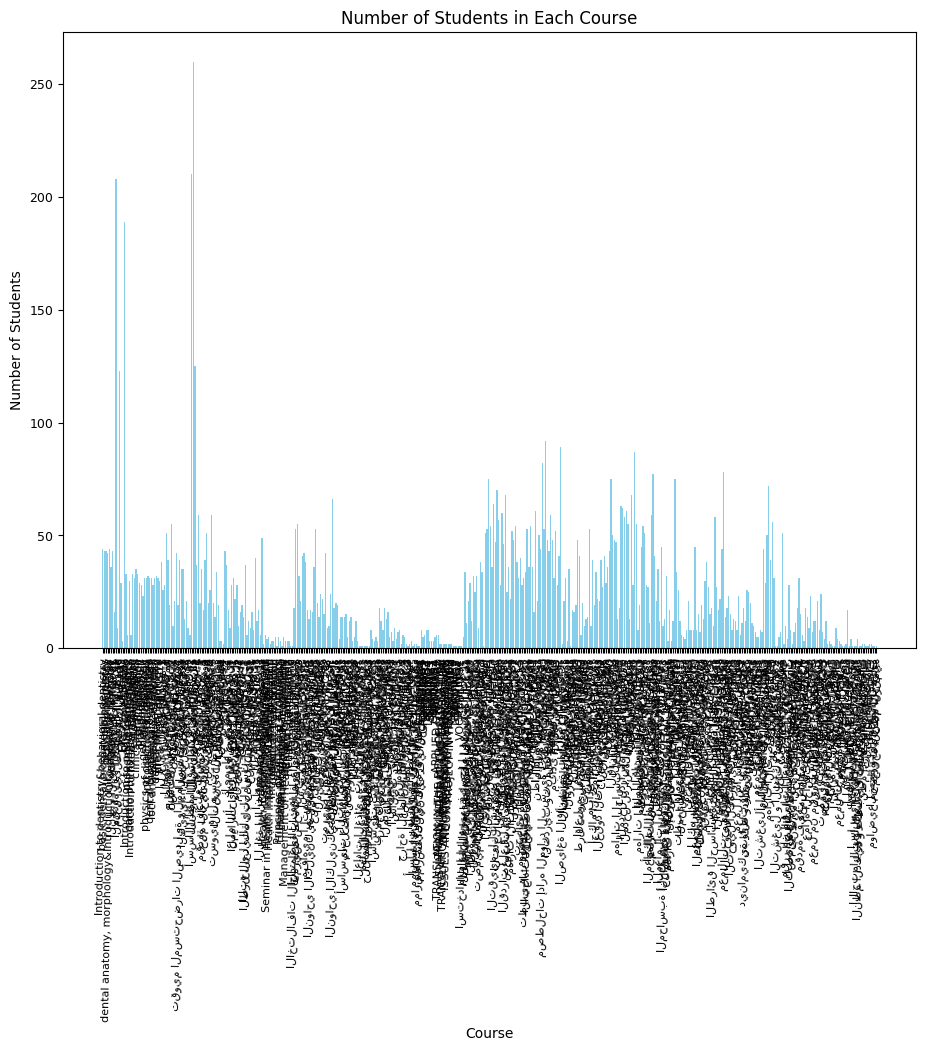

In [120]:
plt.figure(figsize=(11, 8))
plt.bar(course_sizes.keys(), course_sizes.values(), color='skyblue')
plt.xlabel("Course")
plt.ylabel("Number of Students")
plt.title("Number of Students in Each Course")
plt.xticks(rotation=89, fontsize=8)
plt.yticks(fontsize=9)
plt.show()

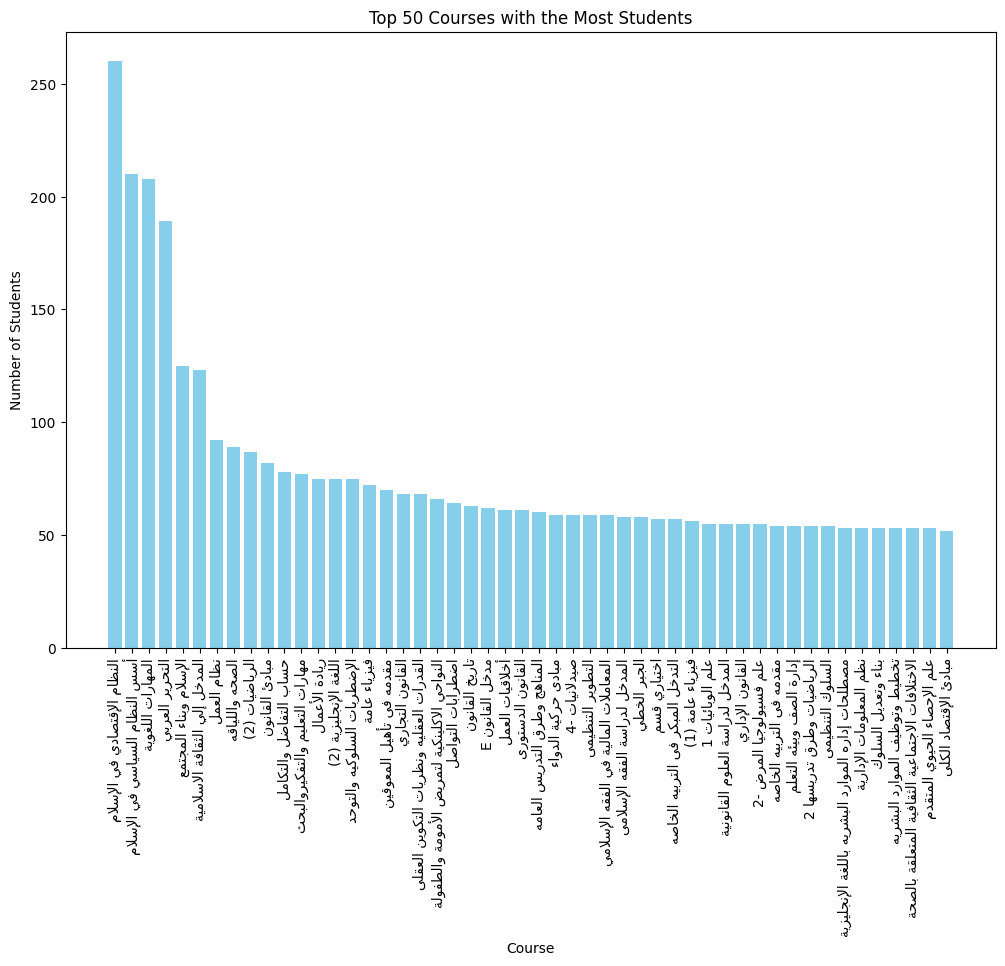

In [121]:
sorted_courses = sorted(course_sizes.items(), key=lambda x: x[1], reverse=True)
# اختيار أعلى50 مادة
top_courses = combined_df['اسم المقرر'].value_counts().head(50)
# Format Arabic labels and title
formatted_labels = [format_arabic(label) for label in top_courses.index]

plt.figure(figsize=(12, 8))
plt.bar(formatted_labels, top_courses.values, color='skyblue')
plt.xlabel("Course")
plt.ylabel("Number of Students")
plt.title("Top 50 Courses with the Most Students")
plt.xticks(rotation=90)
plt.show()

In [122]:
course_degrees = dict(G.degree())

# طباعة درجات المواد
for course, degree in course_degrees.items():
    print(f"Course: {course}, Degree: {degree}")

Course: lntroduction to dentistry&behavioral dentistry, Degree: 16
Course: basic dental biomaterials sciences, Degree: 12
Course: bio-chemistry, Degree: 12
Course: general physiology, Degree: 12
Course: dental anatomy, morphology&Introduction to operative dentistry, Degree: 12
Course: الاسلام وبناء المجتمع, Degree: 10
Course: anatomy& histology, Degree: 12
Course: النظام الاقتصادي في الاسلام, Degree: 13
Course: المهارات اللغوية, Degree: 180
Course: مقدمة في الكيمياء العضوية, Degree: 13
Course: المدخل إلي الثقافة الاسلامية, Degree: 97
Course: مهارات الاتصال, Degree: 53
Course: علم الأحياء, Degree: 8
Course: التحرير العربي, Degree: 208
Course: pre-clinieal endo, Degree: 11
Course: lntroduction to pediatric dentistry, Degree: 9
Course: preventive periodontics, Degree: 13
Course: cardio pulmonary resuscitation, Degree: 9
Course: lntroduction to fixed prosthodontisc, Degree: 11
Course: oral surgery, Degree: 13
Course: resto procedures, Degree: 13
Course: clinical rem. Prostho l, Degree: 11


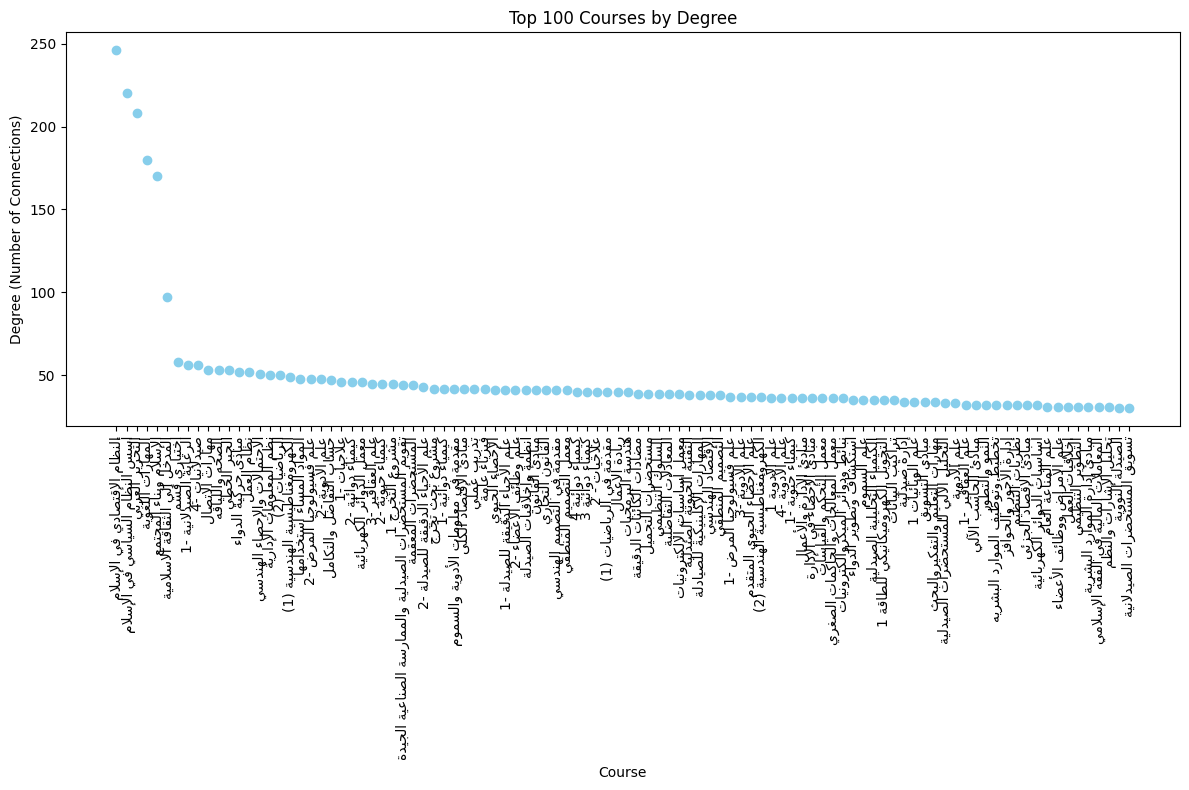

In [131]:
# Sort the courses by their degree (highest first) and get the top 100
top_100_courses = dict(sorted(course_degrees.items(), key=lambda item: item[1], reverse=True)[:100])
#print(top_100_courses)
top_100_courses = {format_arabic(k): v for k, v in top_100_courses.items()}

top_100_degrees = list(top_100_courses.values())
top_100_course_names = list(top_100_courses.keys())  # Now the keys are already formatted

plt.figure(figsize=(12, 8))
plt.scatter(top_100_course_names, top_100_degrees, color='skyblue')
plt.xlabel("Course")
plt.ylabel("Degree (Number of Connections)")
plt.title("Top 100 Courses by Degree")
plt.xticks(rotation=90)  # Rotate the x-axis labels for readability
plt.tight_layout()
plt.show()

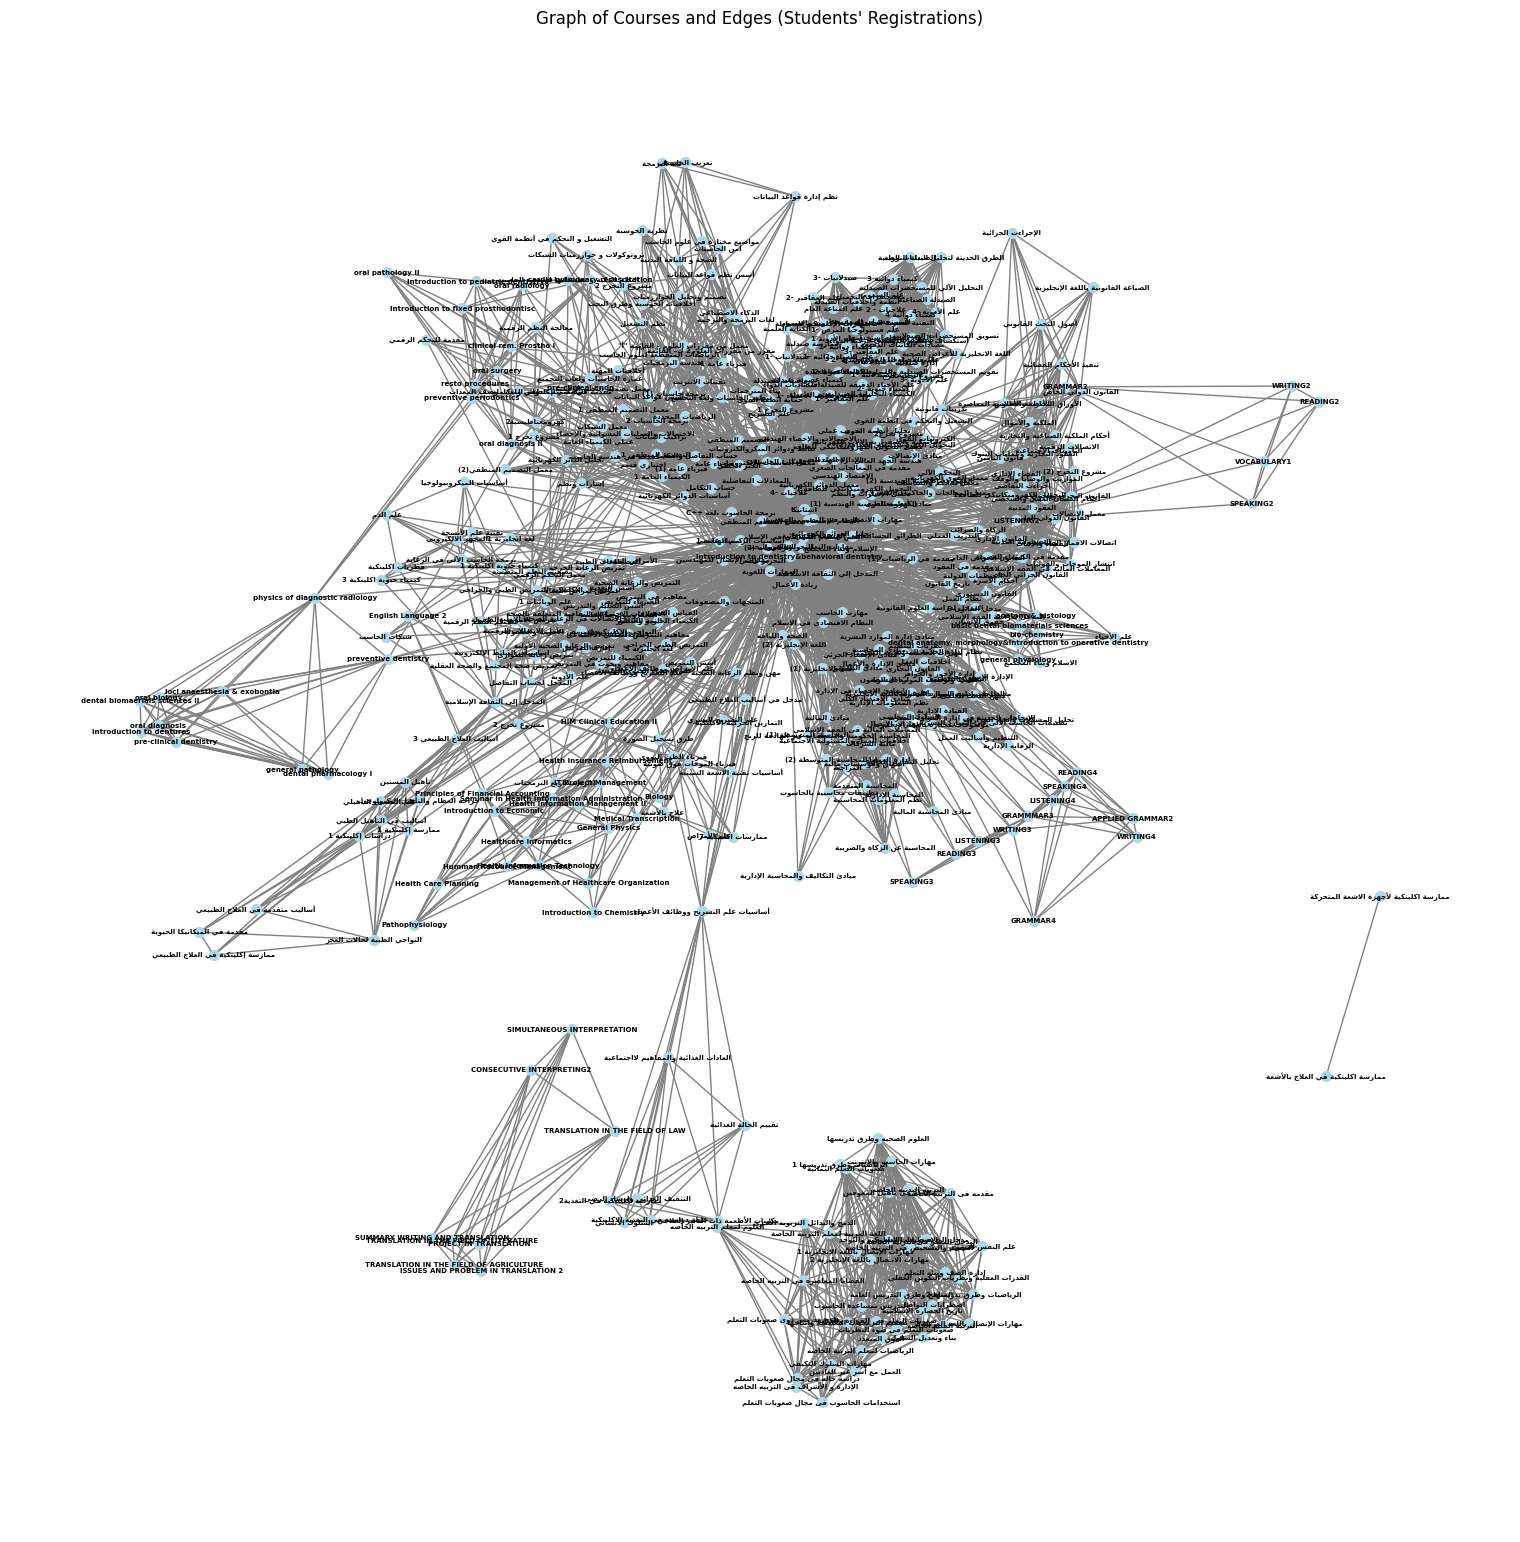

In [132]:
pos = nx.spring_layout(G, k=0.5, iterations=100, scale=1)

# Format node labels before drawing:
labels = {node: format_arabic(node) for node in G.nodes()}

plt.figure(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=50, node_color='lightblue',
        font_size=5, font_weight='bold', edge_color='gray')
plt.title("Graph of Courses and Edges (Students' Registrations)")
plt.show()

In [125]:
# الخوارزميات المتاحة في NetworkX
strategies = ['largest_first', 'random_sequential', 'smallest_last', 'independent_set', 'connected_sequential_dfs', 'connected_sequential_bfs', 'saturation_largest_first']

results = {}

for strategy in strategies:
    start_time = time.time()

    coloring = nx.coloring.greedy_color(G, strategy=strategy)

    end_time = time.time()
    num_colors = len(set(coloring.values()))
    elapsed_time = end_time - start_time

    results[strategy] = {
        'colors': num_colors,
        'time': elapsed_time,
        'coloring': coloring
    }

In [126]:
# طباعة النتائج
print("\n comparing algorithms:\n")
for strategy, data in results.items():
    print(f" Strategy: {strategy}")
    print(f"preiod (colores): {data['colors']}")
    print(f"time : {data['time']:.6f} sec \n")


 comparing algorithms:

 Strategy: largest_first
preiod (colores): 21
time : 0.003635 sec 

 Strategy: random_sequential
preiod (colores): 23
time : 0.002731 sec 

 Strategy: smallest_last
preiod (colores): 20
time : 0.042011 sec 

 Strategy: independent_set
preiod (colores): 25
time : 1.020363 sec 

 Strategy: connected_sequential_dfs
preiod (colores): 21
time : 0.008705 sec 

 Strategy: connected_sequential_bfs
preiod (colores): 23
time : 0.008642 sec 

 Strategy: saturation_largest_first
preiod (colores): 19
time : 0.395050 sec 



In [127]:
greedy_coloring = nx.coloring.greedy_color(G, strategy="saturation_largest_first")

# Check the result
num_periods = len(set(greedy_coloring.values()))
# طباعة كل مادة واللون (الفترة الزمنية) التي تم تعيينها لها
for course, period in sorted(greedy_coloring.items(), key=lambda x: x[1]):
    print(f"course: {course} | period: {period}")

course: النظام الإقتصادي في الإسلام | period: 0
course: معمل التصميم المنطقي | period: 0
course: معمل التصميم المنطقي 1 | period: 0
course: فيزياء عامة 1 | period: 0
course: مبادى المحاسبة | period: 0
course: إدارة الأجور والحوافز | period: 0
course: المحاسبة الإدارية | period: 0
course: لغات البرمجة والترجمة | period: 0
course: معمل التصميم المنطقي(2) | period: 0
course: مبادئ المحاسبة المالية | period: 0
course: القانون الإداري | period: 0
course: أصول البحث القانوني | period: 0
course: علم السموم | period: 0
course: علم وظائف الأعضاء -2 | period: 0
course: صيدلانيات -3 | period: 0
course: تصميم النظم المتضمنة | period: 0
course: علم التشريح البشري | period: 0
course: الميكروبيولوجيا الطبية | period: 0
course: تمريض صحة المجتمع والصحة العقلية | period: 0
course: علم التشريح ووظائف الأعضاء | period: 0
course: التصميم المنطقي ولغات وصف المعدات | period: 0
course: بروتوكولات و خوارزميات الشبكات | period: 0
course: لغة انجليزية 1 | period: 0
course: مبادئ التكاليف والمحاسبة الإدارية | pe